<a href="https://colab.research.google.com/github/antonsysoev/appl_stat/blob/gh-pages/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Подключение среды R

In [1]:
%load_ext rpy2.ipython

2. Установка и подключение необходимых библиотек

In [9]:
%%R
library(readxl)
library(data.table)
install.packages("ggcorrplot")
library(ggcorrplot)
library(dplyr)
library(MASS)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘plyr’, ‘reshape2’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

3. Считывание данных

In [33]:
%%R
data <-fread("/content/dib_dataset.csv")

In [34]:
%%R
str(data)

Classes ‘data.table’ and 'data.frame':	9504 obs. of  192 variables:
 $ locality_code                                                                                                        : chr  "AE" "AF" "AG" "AO" ...
 $ locality_name                                                                                                        : chr  "United Arab Emirates" "Afghanistan" "Antigua and Barbuda" "Angola" ...
 $ date                                                                                                                 : IDate, format: "2020-02-15" "2020-02-15" ...
 $ new_cases                                                                                                            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ new_deaths                                                                                                           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ acc_cases                                                                                                     

4. Отбор числовых признаков, очистка данных

In [35]:
%%R
data_analysis <- data.frame(Y=data$gdp_per_capita_us_dollars_2017, 
                            X1 = data$agricultural_production_index_base_2004_2006_100_2016,
                            X2 = data$food_production_index_base_2004_2006_100_2016,
                            X3 = data$urban_population_percent_2018,
                            X4 = data$sex_ratio_males_per_100_females_2019,
                            X5 = data$population_density_2019,
                            X6 = data$employment_by_industry_industry_male_and_female_2019)


In [36]:
%%R
summary(data_analysis)

       Y                X1              X2              X3        
 Min.   :   378   Min.   : 59.2   Min.   : 59.2   Min.   : 13.20  
 1st Qu.:  2342   1st Qu.:101.5   1st Qu.:101.5   1st Qu.: 43.50  
 Median :  7977   Median :117.3   Median :118.0   Median : 65.35  
 Mean   : 18141   Mean   :121.6   Mean   :122.3   Mean   : 62.59  
 3rd Qu.: 25655   3rd Qu.:139.2   3rd Qu.:139.7   3rd Qu.: 82.20  
 Max.   :166022   Max.   :198.4   Max.   :198.4   Max.   :100.00  
 NA's   :360      NA's   :504     NA's   :504     NA's   :432     
       X4               X5                 X6       
 Min.   : 83.84   Min.   :   2.076   Min.   : 4.79  
 1st Qu.: 94.92   1st Qu.:  37.858   1st Qu.:16.03  
 Median : 97.91   Median :  93.398   Median :19.77  
 Mean   :102.25   Mean   : 294.560   Mean   :20.38  
 3rd Qu.:100.54   3rd Qu.: 222.247   3rd Qu.:25.22  
 Max.   :305.42   Max.   :8291.910   Max.   :54.69  
 NA's   :432      NA's   :360        NA's   :576    


[1] 8856


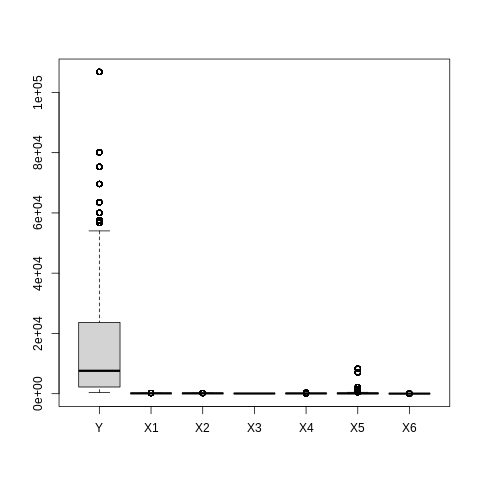

In [40]:
%%R
data_analysis <- na.omit(data_analysis)
summary(data_analysis)
boxplot(data_analysis)
length(data_analysis$Y)

5. Визуализация корреляционных связей

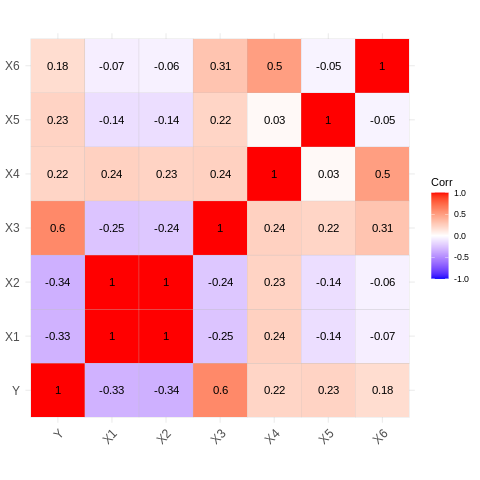

In [41]:
%%R
ggcorrplot(cor(data_analysis), lab = TRUE)

6. Построение множественной линейной регрессии

In [43]:
%%R

m_linear_regression <- lm(Y~., data_analysis)
summary(m_linear_regression)


Call:
lm(formula = Y ~ ., data = data_analysis)

Residuals:
   Min     1Q Median     3Q    Max 
-26635 -10569  -1869   5651  71542 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -364.1374  1093.3314  -0.333   0.7391    
X1          -122.5833    66.5718  -1.841   0.0656 .  
X2           -74.1289    64.0192  -1.158   0.2469    
X3           453.6042     8.2498  54.984   <2e-16 ***
X4           165.2585     8.1564  20.261   <2e-16 ***
X5             1.5501     0.1729   8.964   <2e-16 ***
X6          -231.8902    25.7256  -9.014   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15530 on 8849 degrees of freedom
Multiple R-squared:   0.43,	Adjusted R-squared:  0.4297 
F-statistic:  1113 on 6 and 8849 DF,  p-value: < 2.2e-16



7. Построение пошаговой регрессии

    7.1. На включение

In [47]:
%%R
model_step_forward <- stepAIC(m_linear_regression, direction = "forward")

Start:  AIC=170933.4
Y ~ X1 + X2 + X3 + X4 + X5 + X6



In [48]:
%%R
model_step_backward <- stepAIC(m_linear_regression, direction = "backward")

Start:  AIC=170933.4
Y ~ X1 + X2 + X3 + X4 + X5 + X6

       Df  Sum of Sq        RSS    AIC
- X2    1 3.2323e+08 2.1336e+12 170933
<none>               2.1333e+12 170933
- X1    1 8.1741e+08 2.1341e+12 170935
- X5    1 1.9372e+10 2.1527e+12 171011
- X6    1 1.9588e+10 2.1529e+12 171012
- X4    1 9.8967e+10 2.2323e+12 171333
- X3    1 7.2884e+11 2.8621e+12 173534

Step:  AIC=170932.8
Y ~ X1 + X3 + X4 + X5 + X6

       Df  Sum of Sq        RSS    AIC
<none>               2.1336e+12 170933
- X5    1 1.9371e+10 2.1530e+12 171011
- X6    1 2.0197e+10 2.1538e+12 171014
- X4    1 1.0233e+11 2.2360e+12 171346
- X1    1 2.0103e+11 2.3347e+12 171728
- X3    1 7.2851e+11 2.8621e+12 173532


In [49]:
%%R
model_step_both <- stepAIC(m_linear_regression, direction = "both")


Start:  AIC=170933.4
Y ~ X1 + X2 + X3 + X4 + X5 + X6

       Df  Sum of Sq        RSS    AIC
- X2    1 3.2323e+08 2.1336e+12 170933
<none>               2.1333e+12 170933
- X1    1 8.1741e+08 2.1341e+12 170935
- X5    1 1.9372e+10 2.1527e+12 171011
- X6    1 1.9588e+10 2.1529e+12 171012
- X4    1 9.8967e+10 2.2323e+12 171333
- X3    1 7.2884e+11 2.8621e+12 173534

Step:  AIC=170932.8
Y ~ X1 + X3 + X4 + X5 + X6

       Df  Sum of Sq        RSS    AIC
<none>               2.1336e+12 170933
+ X2    1 3.2323e+08 2.1333e+12 170933
- X5    1 1.9371e+10 2.1530e+12 171011
- X6    1 2.0197e+10 2.1538e+12 171014
- X4    1 1.0233e+11 2.2360e+12 171346
- X1    1 2.0103e+11 2.3347e+12 171728
- X3    1 7.2851e+11 2.8621e+12 173532


8. Сравнение

In [50]:
%%R

AIC(m_linear_regression, model_step_forward, model_step_backward, model_step_both)

                    df      AIC
m_linear_regression  8 196067.6
model_step_forward   8 196067.6
model_step_backward  7 196067.0
model_step_both      7 196067.0
